# Supervised Learning problem : Classification 

multi-class-multi-label classification problem , because there are 9 broad categories that each take on many possible sub-label instances.

websites : https://www.drivendata.org/competitions/46/box-plots-for-education-reboot/
            https://www.erstrategies.org/
            https://rawgit.com/wsurles/datacamp_courses/master/python_courses/machine_learning_with_the_experts_school_budgets/machine_learning_with_the_experts_school_budgets.html
### Introduction to challenge :

School budget in the US are incredibly complex, and there is no standards for importing how money is spent, school want to be able to measure their performance. Ex : are we spending more money on texbooks than the other schools? and is that investement worthwhile? doing this analysis takes hundreds of hours in which analysis hand-categorise each line-item of spending, our goal is to build a machine learning algorithm that can automate this process. 

Ex of line item expens/spendings : 'Algebra books for 8th grade Students'. 
this line has a set of labels attached to it which are our **target variables** : 'textbook', 'math', 'middleschoole' 

Our goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.


**Case Study/Challenge :**  Use data to have a social impact by solving a problem that is related to school district budgeting.  (Supervised Learning problem).

**Goal:** By building a model to automatically classify items in a school's budget, it makes it easier and faster for schools to compare their spending with other schools.

in details : we want to label the budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.


**Approach** : building a baseline model that is a simple, first-pass approach. In particular, you'll do some natural language processing to prepare the budgets for modeling. Next, you'll have the opportunity to try your own techniques and see how they compare to participants from the competition. Finally, you'll see how the winner was able to combine a number of expert techniques to build the most accurate model.


### Steps : 

* NLP : Natural Language Processing
* Feature Engineering 
* Efficiency boosting hashing tricks

## 1- Exploring the raw data : 

**Take away** :   
How do you accurately classify line-items in a school budget based on what that money is being used for? You will explore the raw text and numeric values in the dataset, both quantitatively and visually. And you'll learn how to measure success when trying to predict class labels for each row of the dataset.




In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 1- Loading the Data
df = pd.read_csv('TrainingData.csv')
df.head()

#YOU NEED TO SET INDEX TO df['Unnamed: 0']

,Unnamed: 0,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
1,209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
2,750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN
3,931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
4,1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 26 columns):
Unnamed: 0                1560 non-null int64
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Functi

- FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.  
- Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

In [3]:
# 2- summarizing the data for for the numeric data/columns 
df.describe()

,Unnamed: 0,FTE,Total
count,1560.000000,449.000000,1.542000e+03
mean,227767.180128,0.493532,1.446867e+04
std,130207.535688,0.452844,7.916752e+04
min,198.000000,-0.002369,-1.044084e+06
25%,113690.750000,0.004310,1.108111e+02
50%,226445.500000,0.440000,7.060299e+02
75%,340883.500000,1.000000,5.347760e+03
max,450277.000000,1.047222,1.367500e+06


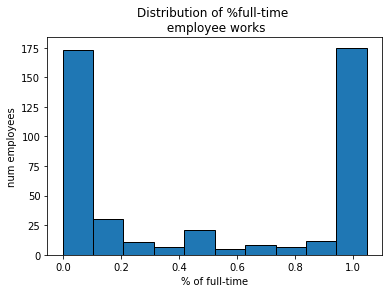

The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.


In [4]:
# histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset.

plt.hist(df['FTE'].dropna(), edgecolor = 'k')
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.show()
print('The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.')

In [5]:
# 3- Looking at the datatypes 

print(df.dtypes.value_counts())
print('There is a lot of string data(23) that we need to convert to numerical type since ML works on numbers')

object     23
float64     2
int64       1
dtype: int64
There is a lot of string data(23) that we need to convert to numerical type since ML works on numbers


In [6]:
#4- Encode the labels as categorical variables

print('There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take).')

labels = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type','Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']



There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take).


In [7]:
df[labels].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

In [8]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[labels] to a categorical type
df[labels] = df[labels].apply(categorize_label, axis = 0)

# Print the converted dtypes
print(df[labels].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


Function            37
Use                  8
Sharing              5
Reporting            3
Student_Type         9
Position_Type       25
Object_Type         11
Pre_K                3
Operating_Status     3
dtype: int64


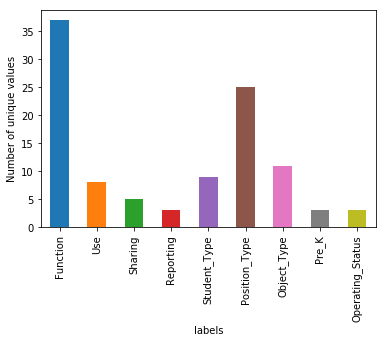

 That's a lot of labels to work with. How will you measure success with these many labels? 


In [9]:
#5 - Counting unique labels: (there are over 100 unique labels)
num_unique_labels = df[labels].apply(pd.Series.nunique)
print(num_unique_labels)

# Plot number of unique values for each label
num_unique_labels.plot(kind = 'bar')

# Label the axes
plt.xlabel('labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

print(" That's a lot of labels to work with. How will you measure success with these many labels? ")

#### How do we measure success?  

choosing how to evaluate machine learning model: log loss/ loss function instead of accuracy

**accuracy** : is a simple measure that gives the % the rows we got right. accuracy can be misleading when classes are not imbalanced. 

**log loss** : is a measure of error, we want our error to be small as possible(unlike accuracy where we want to maximize the value).

###### Log loss binary classification : 

it takes the actual value(yi) 1 or 0, and it takes our prediction(pi) which is a probability btw 0 and 1

logloss=−1N∑i=1N(yi log(pi)+(1−yi)log(1−pi))



Log loss binary classification: example
logloss(N=1)=ylog(p)+(1−y)log(1−p)
 
*case 1 : True label (yi) = 0
Model confidently predicts 1 (with p = 0.90 the model is confident) 
Log loss =
ylog(p) + (1 - y)log(1 - p)
0log(.9) + (1 - 0)log(1 - .9)
0 + log(0.1)
**2.30** the error is large means the model is wrong dispite p = 0.90

*case2 : label (yi) = 1
Model predicts 0 (with p = 0.50 )
log loss = **0.69** the error is minimal comparing to first case which means model is accurate.

P.S : better to be less confident than confident and wrong. 

Penalizing highly confident wrong answers : log loss provides a steep penalty for predictions that are both wrong and confident, i.e., a high probability is assigned to the incorrect class.

N.B 
- np.clip function : sets a maximum and a minimum value for the elements of an array.
- eps : since log(0) is a negative infinity, we want to offset our predictions ever so slightly from being exacly 1 or exaclty 0 so that our score remain a real number so we use eps=1e-14 (close enough to 0 not to affect our overall score). 

In [10]:
## Computing log loss

def compute_log_loss(predicted, actual, eps=1e-14):
    """Computes the logarithmic los between predicted and actual when these are 1D arrays.
    
    :param predicted: The predicted probabilities as floats bwtween 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our predicted values slightly by eps from 0 or 1.
    """
    
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))

    return loss

# runing on previous case 1 example 
print(compute_log_loss(0.90, 0))

# runing on previous case 2 example 
print(compute_log_loss(0.50, 1))

print('Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models')

2.302585092994046
0.6931471805599453
Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models


# 2- Creating a simple first model : based only on numerical columns

it's always good approach to start with a very simple model, it helps give a sens of how much challenging the problem is. We will start with a model that uses just the numeric data columns, in this first model we want to go from raw data to predictions as quickly as possible. In this case we will use multi-class logistic regression, which treat each label column as idependant. the model will train logistic regression classifier for each of the numerical columns separatly and then use those models to predict whether the label appears or not for any given rows. 

The approach of split_train_test wont work in this case because of nature of data, because some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets, so the solution is : **StratifiedSuffleSplit** (this sklean function only works with a signle target variable, in our case we have many target variables). To work around this issue we have provided a utility function **multilabel_train_test_split()** that will ensure that all of the classes are represented in both train and test sets. 


Steps to build the model :
- Step 1: Subset the data to only numerical columns. and preprocess by filling the NaN with -1000(we want our algorithm to respond to NaN's diffrently than 0).
- Step 2: creat an array of target variables using get_dummies(takes target variables and produces binary indicators). 
- Step 3: Split_train_test using multilabel_train_test_split(). 
_ Step 4: importing LogisticRegression and oneVsRest classifer(let us treat each column of y independently, it fits a separate clissifier for each column), (it's a strategy used when we have multiple classes, there are other strategies to use).
- Step 5: train the classifier on x_tain, y_train data. 
- Step 6: predictiong on X_test data and evaluating the model with logloss. 

*link to **multilabel_train_test_split()** (his function will ensue that atleast min_count examples of each label appear in each split): https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/data/multilabel.py

P.S : Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.


In [11]:
# multilabel_train_test_split() function:

from warnings import warn
import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).all():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [12]:
## STEP 1: Create the new DataFrame: numeric_data_only
numeric_columns = ['FTE', 'Total']

numeric_data_only = df[numeric_columns].fillna(-1000)

numeric_data_only.head()

,FTE,Total
0,-1000.0,-8291.86
1,-1000.0,618.29
2,1.0,49768.82
3,-1000.0,-1.02
4,-1000.0,2304.43


In [13]:
# Step 2: Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[labels])

label_dummies.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [14]:
# step 3: Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only, label_dummies,size=0.2, seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1559
Data columns (total 2 columns):
FTE      1040 non-null float64
Total    1040 non-null float64
dtypes: float64(2)
memory usage: 24.4 KB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 1 to 1549
Data columns (total 2 columns):
FTE      520 non-null float64
Total    520 non-null float64
dtypes: float64(2)
memory usage: 12.2 KB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1559
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 113.8 KB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 1 to 1549
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 56.9 KB
None


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Size less than number of columns * min_count, returning 520 items instead of 312.0.


In [15]:
# Step 4 and step 5 

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train,y_train)

# Print the accuracy for the results of training.
print("Accuracy: {}".format(clf.score( X_test, y_test)))

print("The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.")

Accuracy: 0.0
The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.


In [16]:
# Step 6: predictiong on X_test data and evaluating the model with logloss 


# extacting numerical columns and filling NaN's with -1000
X_test_data = X_test[numeric_columns].fillna(-1000)

# predictions for X_test
predictions = clf.predict_proba(X_test_data)

#building dataframe for the probability predictions
col_names = pd.get_dummies(df[labels]).columns
df_test_predictions = pd.DataFrame(data =predictions, columns =col_names, index = y_test.index)

df_test_predictions.head()

print("if .predict() was used instead the output would be 0 or 1, log loss penalizes being confident and wrong, we would have gotten worse performance compared to .predict_proba()")

if .predict() was used instead the output would be 0 or 1, log loss penalizes being confident and wrong, we would have gotten worse performance compared to .predict_proba()


In [17]:
# y_test (Actual results)

y_test.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [18]:
# make sure that format is correct so we can compare btw prediction and actual results
assert (df_test_predictions.columns == y_test.columns).all()
assert (df_test_predictions.index == y_test.index).all()

# Evaluating the model with log loss 
print(compute_log_loss(df_test_predictions.values, y_test.values))


0.21690826180176895


#### Making predictions on new data : holdout data

The original competition provides an additional test set, for which you'll never actually see the correct labels. This is called the "holdout data."

The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the probability of each label. In this exercise you'll do just that by using the .predict_proba() method on your trained model.


The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the probability of each label:

This file containes the target to new data set
file = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv'


In [19]:
# load the new data set
df_holdout = pd.read_csv('HoldoutData.csv')

#prediction on the new dataset
predictions = clf.predict_proba(df_holdout[numeric_columns].fillna(-1000))

# print(predictions)

#Writing out your results to a csv for submission
# use your predictions values to create a new DataFrame, prediction_df : 


# getting the target labels to set for the predictions

file = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv'
holdout_labels = pd.read_csv(file, index_col = 0)


# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(data=predictions, 
                             columns= pd.get_dummies(holdout_labels[labels]).columns, 
                             index=holdout_labels.index,)

# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# prediction_df

In [20]:
# # Submit the predictions for scoring: score

def score_submission(holdout_predictions, holdout_labels):

    ## convert the holdout labels to boolean columns
    holdout_labels = pd.get_dummies(holdout_labels.apply(lambda x: x.astype('category'), axis=0))
    
    # make sure that format is correct
    assert (holdout_predictions.columns == holdout_labels.columns).all()
    assert (holdout_predictions.index == holdout_labels.index).all()

    return compute_log_loss(holdout_predictions.values, holdout_labels.values)

# Submit the predictions for scoring: score
score = score_submission(prediction_df, holdout_labels)

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

print('\n Here we got 0.19377 which is much better than 0.2169 that we had with the test data.')

print("\n Even though your basic model scored 0.0 accuracy, it nevertheless performs better than the benchmark score of 2.0455. You've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to step up your game and incorporate the text data.")

Your model, trained with numeric data only, yields logloss score: 0.19377309958609842

 Here we got 0.19377 which is much better than 0.2169 that we had with the test data.

 Even though your basic model scored 0.0 accuracy, it nevertheless performs better than the benchmark score of 2.0455. You've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to step up your game and incorporate the text data.


## A very brief introduction to NLP : incorporating test data in our model. 

### from text data to numerical data
when we have a Text, documents, speech data we want to process this it to create freatures for our algorithm this is called NLP. The first step in processing this kind of data called **Tokeniation**. 

**Tokenization** : is the process of splitting a string into segments, this means taking a string and splitting it into a list of strings where we have one string for each word.  

*Tokens and token patterns: 
- Tokenize on whitespace
'Petro-Vend Fuel and Fluids' >> ['Petro-Vend','Fuel','and','Fluids'] each token is called 1grams
_ Tokenize on whitespace and punctuation
'Petro-Vend Fuel and Fluids'>> ['Petro','Vend','Fuel','and','Fluids']


*Atfer the tokenization we create a colum for each token and Count the number of times a particular token appears in a row, this is called **Bag of words representation**, this approach discads information about word order, this means that the phrase "Red, not blue" is the same as "blue, not red". 

A slightly sophisticated approach than simply counting words is to create what are called **n_grams** :  which is to link multiple words together. 
single words is 1-gram, two words is 2-gram or bigram and so on.
This maintains word order.


### Representing text numerically to feed to ML model : 

the simplest way is to use Bag-of-words becaue it discards information about grammar and word order just by assuming frequency of occurrence of a word is enough information.

***Sciket-learn tools for bag-of-words : CountVectorizer()***
- Tokenizes all the strings
- Builds a 'vocablary' (which is the list of tokens)
- Counts the occurrences of each token in the vocabulary

####  Creating a bag-of-words in scikit-learn
Here we will just practice with one column: The Position_Extra column has additional info not captured in Position_Type, like 'Bus Driver'.

In [21]:
# Creating a bag-of-words in scikit-learn (but we don't count the occurence of each word we counted the sum of tokens)


# Import CountVectorizer (counts the number of tokens)
from sklearn.feature_extraction.text import CountVectorizer


# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_WHITESPACE = '\\S+(?=\\s+)'
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# focusing on one feature only: the Position_Extra column, which describes any additional information not captured by the Position_Type label.
# column df.Position_Extra before tokenization

print(df.Position_Extra[:15])

# Fill missing values in df.Position_Extra with empty space (inplace =don't have to assign the result back to df)
features = df.Position_Extra.fillna('')

# Instantiate the CountVectorizer: vec_alphanumeric
vec_whitespace = CountVectorizer(token_pattern = TOKENS_WHITESPACE)
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_whitespace.fit(features)
vec_alphanumeric.fit(features)

# Print the number of tokens and first 15 tokens 

msg1 = "\nThere are {} tokens in Position_Extra if we split on white-space only"
print(msg1.format(len(vec_whitespace.get_feature_names()))) 
print('\nHere are the first 15 tokens:')
print(vec_whitespace.get_feature_names()[:15])
print('\n----------------------------------')

msg2 = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg2.format(len(vec_alphanumeric.get_feature_names()))) 
print('\nHere are the first 15 tokens:')
print(vec_alphanumeric.get_feature_names()[:15])

print("\nTreating only alpha-numeric characters as tokens gives you a smaller number of more meaningful tokens. You've got bag-of-words in the bag!")



0                            NaN
1                            NaN
2                        TEACHER
3                            NaN
4                            NaN
5                            NaN
6                            NaN
7     PROFESSIONAL-INSTRUCTIONAL
8                            NaN
9                   UNDESIGNATED
10                  UNDESIGNATED
11    PROFESSIONAL-INSTRUCTIONAL
12                  UNDESIGNATED
13    PROFESSIONAL-INSTRUCTIONAL
14    PROFESSIONAL-INSTRUCTIONAL
Name: Position_Extra, dtype: object

There are 135 tokens in Position_Extra if we split on white-space only

Here are the first 15 tokens:
['&', '(no', '-', '1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'art', 'assessment']

----------------------------------
There are 123 tokens in Position_Extra if we split on non-alpha numeric

Here are the first 15 tokens:
['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'art', 'assessmen

#### Combining text columns for tokenization 
In the real world we will use all the text columns to create the set of tokens. Each row will have a bunch of words that represent it.

??I guess it does not matter, in this case, which column it comes from.

In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.

In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. CountVectorizer expects each row to just be a single string, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.

In this exercise, you'll complete the function definition combine_text_columns(). When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

Note that the function uses NUMERIC_COLUMNS and LABELS to determine which columns to drop. 

In [22]:
## Combining text columns for tokenization 
# Define combine_text_columns()

def combine_text_columns(data_frame, to_drop= numeric_columns + labels):
    """ converts all text in each row of data_frame to single vector/ phrase after joining all the text in a row """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('',inplace= True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

What's in a token?

Now you will use to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.

In [23]:
#Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern= TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern= TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df.drop('Unnamed: 0', axis=1))
print(' the first row is now represented by this vector:\n', text_vector[0])

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("\nThere are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric (does this calculate the sum of all tokens or just the sum of unique tokens)
print("\nThere are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

print('\nNotice that tokenizing on alpha-numeric tokens reduced the number of tokens, just as in the last exercise. ')


 the first row is now represented by this vector:
 Supplemental *  Operation and Maintenance of Plant Services    Non-Certificated Salaries And Wages  Care and Upkeep of Building Services    Title I - Disadvantaged Children/Targeted Assistance TITLE I CARRYOVER

There are 1384 tokens in the dataset

There are 1098 alpha-numeric tokens in the dataset

Notice that tokenizing on alpha-numeric tokens reduced the number of tokens, just as in the last exercise. 


In [31]:
text_vector = combine_text_columns(df.drop('Unnamed: 0', axis=1))
text_vector[0]

'Supplemental *  Operation and Maintenance of Plant Services    Non-Certificated Salaries And Wages  Care and Upkeep of Building Services    Title I - Disadvantaged Children/Targeted Assistance TITLE I CARRYOVER'

N.B : here we processed the data frame text to incorporate it in our alogrithm but they dind't build the model that takes numeric and precessed text. 

# 3- mproving your model :

Here, you'll improve on your benchmark model using pipelines. Because the budget consists of both text and numeric data, you'll learn to how build pipielines that process multiple types of data. You'll also explore how the flexibility of the pipeline workflow makes testing different approaches efficient, even in complicated problems like this one!

## 3.1 Pipelines, feature & text preprocessing :

Pipeline is a very flexible way to represent workflow : is a repeatable way to go from raw data to trained model. Pipeline object takes sequential list of steps, and the Output of one step is input to next step, and Each step is a tuple with two elements
Name: string
Transform: obj implementing .fit() and .transform()

either use make_pipeline and passe it the steps
or use Pipeline([('name_of the_step', stelp(wich is Transform)])


##### we will start by bulding a model that uses only numerical column to predict the lables


In [30]:
# Pratice building a pipeline with sample data

sample_df = pd.DataFrame({'numeric': [-10.85630603,   9.97345447,   2.82978498, -15.06294714,
        -5.78600252,  16.51436537, -24.26679243,  -4.28912629,
        12.65936259], 'text':['', 'foo', 'foo bar', '', 'foo bar', '', 'foo bar', 'foo', ''], 'with_missing':[4.43324013, 4.31022893, 2.46982849, 2.85298126, 1.8264749 ,
       2.76431471, 3.02431714, 2.59604007, 2.49641543], 'label':['b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a']})

sampl_df


NameError: name 'sampl_df' is not defined

In [35]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  1.0


In [41]:
#  incorporate numeric data with missing values by adding a preprocessing step

# improve pipeline by using the Imputer() to fill in missing values in your sample data(replaces NaNs with the mean value of the column).

# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)




Accuracy on sample data - all numeric, incl nans:  1.0


##### bulding a model that uses only text to predict the lables : 


In [40]:
# import CountVectoriser and pipeline 

# Create training and test sets using only text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)
# Insantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

pl.fit(X_train, y_train)
accuracy = pl.score(X_test, y_test)
print('accuracy on sample data',accuracy)

accuracy on sample data 0.6666666666666666


## 3.2 Text features and feature unions

#### Building a model based on numerical data and text data by processing multiple data type: 

The problem is that we can not build a pipeline that has CountVectoriser Step, Impter step and classifier, because we feed the pipeline the data and all the data goes by those steps but the we can not apply CountVectoriser numerical data or imputer on text data. 
In oder to build a pipeline we need to separetly operate on the text columns and the numerical columns. there are 2 tools : **FunctionTransformer** and **FeatureUnion** that will help us work with both text and numerical data. 

##### 1- Function Transformer : 
Turns a Python function into an object that a scikit-learn pipeline can understand

we will need to write two functions for pipeline preprocessing : 
_ the first takes entire DataFrame, return numeric columns
_ the second takes entire DataFrame, return text columns

using those function transformers we can build a separate pipline for our numeric data and for out text data

##### 2- feature Union : 
joins the numerical array and text array after being processed in one signle array that will be the input to the classifier. 

In [46]:
#Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion


# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(
    sample_df[['numeric', 'with_missing', 'text']],
    pd.get_dummies(sample_df['label']), 
    random_state=22)


# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)


####################
#testing 
# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('----------------------')
print('\nNumeric Data')
print(just_numeric_data.head())
###########################

#this supposed to work but it doesn't, I used the same idea but i guess it needs .fit_transform
# # process text data:  
# text_pipeline = Pipeline([('get_text', get_text_data),('vec', CountVectorizer())])
# # process numeric data: 
# numeric_pipeline = Pipeline([('get_numeric', get_numeric_data),('imputer', Imputer())])

# # FeatureUnion joining processed numeric and text data :
# union = FeatureUnion([('numeric', numeric_pipeline), ('text', text_pipeline)]
                                  
# #Instantiate nested pipeline: pl
# big_pipeline = Pipeline([('union', union), ('clf', OneVsRestClassifier(LogisticRegression()))])

#############

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)

Text Data
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object
----------------------

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475

Accuracy on sample data - all data:  0.6666666666666666


#### Choosing a classification model: 

##### Using FunctionTransformer on the main dataset and than building the pipeline

In [ ]:
print(labels)
print(numeric_columns)

In [52]:
j = df.set_index(df['Unnamed: 0'],)
L = j.drop('Unnamed: 0', axis=1)
# L.head()

In [56]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels Y
dummy_labels = pd.get_dummies(L[labels])

# Get the columns that are features in the original df X
NON_LABELS = [column for column in L.columns if column not in labels]
print(NON_LABELS)
# Split into training and test sets
XX_train, XX_test, yy_train, yy_test = multilabel_train_test_split(L[NON_LABELS], dummy_labels, 0.2, seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(
    combine_text_columns,
    validate = False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(
    lambda x: x[numeric_columns], validate=False)



['Object_Description', 'Text_2', 'SubFund_Description', 'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description', 'Location_Description', 'FTE', 'Function_Description', 'Facility_or_Department', 'Position_Extra', 'Total', 'Program_Description', 'Fund_Description', 'Text_1']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Size less than number of columns * min_count, returning 520 items instead of 312.0.


In [57]:
## ADD model to pipeline : 
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(XX_train, yy_train)

# Compute and print accuracy
accuracy = pl.score(XX_test, yy_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.20384615384615384


##### Try a different class of model
Look how easy it is to change the model
Here we will swap out the logistic-regression model and replace it with a random forest classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

In [59]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the main training data 
pl.fit(XX_train, yy_train)

# Compute and print accuracy
accuracy = pl.score(XX_test, yy_test)
print("\nAccuracy on budget dataset: ", accuracy) ## THERE IS SOMETHING WRONG IT SHOULD BE 0.904877896446


Accuracy on budget dataset:  0.28076923076923077


#### Can you adjust the model or parameters to improve accuracy?
Here we just do a bit of parameter tuning to improve accuracy
It would be nicer if I could dynamically set the model in a variable and then just rerun the same code.
But I will just follow along with the class code for now.

In [60]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators = 15))
    ])

# Fit to the training data
pl.fit(XX_train, yy_train)

# Compute and print accuracy
accuracy = pl.score(XX_test, yy_test)
print("\nAccuracy on budget dataset: ", accuracy) ## THERE IS SOMETHING WRONG

print('That seems accurate given the nature of the data noe lets see what the log loss of the tweeked model will be.')


Accuracy on budget dataset:  0.3211538461538462
That seems accurate given the nature of the data noe lets see what the log loss of the tweeked model will be.


# 4 - Learning from the experts: 


The model that won used those tricks : 
- NLP: Range of n-grams, punctuation tokenization
- Stats: Interaction terms
- Computation: Hashing trick

What class of model was used? Logistic Regression? Yep

Sometime a simple model with smarlty chosen feature engineering is all thats needed.
And its usually better to start with simple models that can also offer explaination.

## 4.1 processing tricks to get better score :  text processing, statistical methods, computational efficency 

by knowing which tricks to use and which tools to combine, we can build extremely effective models.

1/ text processing : 

NLP tricks used for text data : 
- **Tokenization trick** : Tokenize on punctuation to avoid hyphens, underscores, etc
_ **n_grams trick** : Include unigrams and bi-grams in the model to cature important information involving multiple tokens - e.g. 'middle school'.      



*we can change the way we preprocess text data N-grams and tokenization by simply changing COuntVectorizer function on the pipeline: 

vec = COuntVectorizer(token_pattern = alphanumeric_tokenization , ngram_range = (1, 2))   



N.B : the way you tokenize text affects the n-gram statistics used in your model.
We will use alpha-numeric sequences, and only alpha-numeric sequences, as tokens. Alpha-numeric tokens contain only letters a-z and numbers 0-9 (no other characters). In other words, you'll tokenize on punctuation to generate n-gram statistics.


In [61]:
# **Tokenization trick** : how the text features will be processed using alphanumeric pattern 
#Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(XX_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:30])


['00a', '12', '1st', '2nd', '4th', '5th', '70h', '8', 'a', 'ab', 'acad', 'academ', 'academic', 'academy', 'accelerated', 'access', 'accountability', 'accounting', 'accounts', 'achieve', 'acq', 'act', 'activi', 'activiti', 'activities', 'activity', 'additional', 'addl', 'aditional', 'admin']


In [65]:
# *n_grams trick** compute multiple n-gram features to be used in the model.
# N-gram range in scikit-learn

#In order to look for ngram relationships at multiple scales, you will use the ngram_range(1,2)

#Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(XX_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features  with ngram_range
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2))

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:30])

print('\n Note : we can see that text processing based on alpha numeric token pattern and ngram_range gives a diffrent result than tokenizing only with alphanumeric pattern')

['00a', '00a office', '00a supplies', '12', '12 general', '12 instruction', '12 reserved', '1st', '1st grade', '2nd', '2nd grade', '4th', '4th grade', '5th', '5th grade', '70h', '8', '8 education', '8 general', '8 instruction', '8 primary', 'a', 'a arra', 'a improving', 'a instr', 'a legacy', 'a lep', 'a professional', 'a schoolwide', 'a super']

 Note : we can see that text processing based on alpha numeric token pattern and ngram_range gives a diffrent result than tokenizing only with alphanumeric pattern


## 4.2 Building the wining model : with text processing tricks 

Special functions: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the dim_red step following the vectorizer step , and the scale step preceeding the clf (classification) step.

These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a dimensionality reduction technique, which is what the dim_red step does, and we have to scale the features to lie between -1 and 1, which is what the scale step does.

The dim_red step uses a scikit-learn function called SelectKBest(), applying something called the chi-squared test to select the K "best" features. The scale step uses a scikit-learn function called MaxAbsScaler() in order to squash the relevant features into the interval -1 to 1

In [70]:
# wining model pipeline : 


# Import pipeline
#from sklearn.pipeline import Pipeline

# Import classifiers
#from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
#from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
#from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
#from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[numeric_columns], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

#So how much better is this?
# Fit to the training data
pl.fit(XX_train, yy_train)

# Compute and print accuracy
accuracy = pl.score(XX_test, yy_test)
print("\nAccuracy on budget dataset: ", accuracy)

print('Well its much better than the previous logisitic regression model But not nearly as good as the Random forest model')


Accuracy on budget dataset:  0.19230769230769232
Well its much better than the previous logisitic regression model But not nearly as good as the Random forest model


## 4.3 add some additional tricks to make the pipeline even better : a stats trick 

we use bigrams(n_gram =2) to count for when words apprear in a certain order, but what if the words are not next each other. Solutin :  The statistical tool that the winner have used is called **Interaction terms** : it let us mathematically describe when tokens appear together.

Example : 
- English teacher for 2nd grade
- 2nd grade - budget for English teacher

math explanation for interaction terms : β1x1+β2x2+β3(x1×x2)

*β1x1*
x1 represent token and it equals if present or 0 if it's not
β1 is a coefficient that represents how important the tokens is 

*Same for β2x2*

*β3(x1×x2)* is the interaction term btwn words x1 and x2 if they appear together
β3 measurs the importance of both words appearing together 


#### Adding interaction features with scikit-learn 

interaction features in sklearn are called polynomial features 

Sparse interaction features
The number of interaction terms grows exponentially
Our vectorizer saves memory by using a sparse matrix
Polynomial Features does not support sparse matrices


#### Implement interaction modeling in scikit-learn pipeline
It's time to add interaction features to your model. The PolynomialFeatures object in scikit-learn does just that, but here you're going to use a custom interaction object, SparseInteractions. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

**SparseInteractions** does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. You can get the code for SparseInteractions at this GitHub Gist.https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py

PolynomialFeatures and SparseInteractions both take the argument degree, which tells them what polynomial degree of interactions to compute.

You're going to consider interaction terms of degree=2 in your pipeline. You will insert these steps after the preprocessing steps you've built out so far, but before the classifier steps.

Pipelines with interaction terms take a while to train (since you're making n features into n-squared features!), so as long as you set it up right, we'll do the heavy lifting and tell you what your score is!We have provided SparseInteractions to work for this problem
the function code is provided 






In [76]:
from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(degree=2,interaction_only = True, include_bias = False)

# interaction.fit_transform(x)
# x should be text data


# Notes:
# degree means compare 2 words if they appear together
# the interaction_only term means don't multiple a term by itself
# the include bias term allows model to have non-zero y value when x value is zero.
# Its like the intercept value for a regression line I think

In [80]:
##**SparseInteractions** 

from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [84]:
##  Implement interaction modeling in scikit-learn pipeline 

l = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

#So how much better is this?
# Fit to the training data
pl.fit(XX_train, yy_train)

# Compute and print accuracy
accuracy = pl.score(XX_test, yy_test)
print("\nAccuracy on budget dataset: ", accuracy)

print("\n it is not a good idea to run this model on the full dataset without using the last technique **SparseInteractions**  to increase computation efficiency, This models takes an extremely long time. The number of features grows exponentially when you add interaction terms. We can limit the number of features by using a hash table This will be covered next.")


Accuracy on budget dataset:  0.19230769230769232

 it is not a good idea to run this model on the full dataset without using the last technique **SparseInteractions**  to increase computation efficiency, This models takes an extremely long time. The number of features grows exponentially when you add interaction terms. We can limit the number of features by using a hash table This will be covered next.


## 4.4 a computational trick and the winning model : Hashing trick 

Hashing trick : 
- Adding new features ngram_range =(1,2,3) may cause enormous increase in array size
- Hashing is a way of increasing memory efficiency
- Hash function limits possible outputs, fixing array size
- multiple tokens may be added to the same hash, but this has been shown (in research papers) to not have much of a negative impact on the models ability to predict. Thats, um, pretty neat.

When to use the hashing trick: 
- Want to make array of features as small as possible
- - Dimensionality reduction
- Particularly useful on large datasets e.g., lots of text data!


a hash function takes an input, in your case a token word, and outputs a hash value number. so instead of using CountVectoriser that retuns a bag of word we use HashingVectorizer that return intergers. 

Some computation problems are memory-bound and not easily parallelizable, and hashing enforces a fixed length computation instead of using a mutable datatype (like a dictionary). By explicitly stating how many possible outputs the hashing function may have, we limit the size of the objects that need to be processed. With these limits known, computation can be made more efficient and we can get results faster, even on large datasets.(Enforcing a fixed length can speed up calculations drastically, especially on large datasets)

In [85]:
from sklearn.feature_extraction.text import HashingVectorizer

vec = HashingVectorizer(
    norm = None,
    non_negative = True,
    token_pattern = TOKENS_ALPHANUMERIC,
    ngram_range = (1,2))


In [86]:
#Ex of how hasing works : 

hash_dict = {'and': 780, 'fluids': 354, 'fuel': 895, 
             'petro': 354, 'vend': 785}
print(hash_dict)


{'and': 780, 'fluids': 354, 'fuel': 895, 'petro': 354, 'vend': 785}


In [87]:
# how hashingvectoriser will work on our data 

# Import HashingVectorizer
from sklearn.feature_extraction.text import  HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(XX_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern = TOKENS_ALPHANUMERIC )

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())


print('HashingVectorizer retuns integers instead of bag of words and as you can see, some text is hashed to the same value ')

          0
0 -0.162221
1  0.162221
2 -0.486664
3 -0.324443
4  0.162221


## 4.5 : building the model's pipeline that contains all the tricks 

The winning model used skillful NLP, efficient computation, and simple but powerful stats tricks to master the budget data

You've constructed a robust, powerful pipeline capable of processing training and testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code. Wow!

All you need to do is add the HashingVectorizer step to the pipeline to replace the CountVectorizer step.

The parameters non_negative=True, norm=None, and binary=False make the HashingVectorizer perform similarly to the default settings on the CountVectorizer so you can just replace one with the other.

** the wining model code ** : https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb

If you want to use this model locally, this Jupyter notebook contains all the code you've worked so hard on. You can now take that code and build on it!

In [88]:
# building the model's pipeline that contains all the tricks

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(XX_train, yy_train)

# Compute and print accuracy
accuracy = pl.score(XX_test, yy_test)
print("\nAccuracy on budget dataset: ", accuracy)

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)



Accuracy on budget dataset:  0.3173076923076923
